# Exploración Profunda de Emociones Textuales

Hoy en día las redes sociales son una plataforma poderosa para la autoexpresíon y, al mismo tiempo, un lugar donde se puede detectar el estado emocional de las personas. Buscamos no solo identificar la naturaleza emocional de los textos sino también proporcionar una herramienta analítica que pueda ser  útil para intervenir de manera oportuna en situaciones de crisis emocional o psicológica. Esto podría ser de gran ayuda para organizaciones dedicadas al bienestar mental, empresas de redes sociales, y agencias gubernamentales interesadas en monitorear y mejorar la salud emocional de la población.

Tendremos un como entrada un conjunto de datos obtenidos de la plataforma Kaggle. Este dataset cuenta con 1.6 millones de tweets, donde estos se encuntran claseificados en 0 = negativo, 2 = neutral y 4 = positivo. También podemos encontrar ids, date, flag, user y text. Con esto podremos clasificar nustro texto en positivo y negativo.

**ADQUISICIÓN DE LOS DATOS**

El conjunto de datos a utilizar es "Sentiment140 dataset with 1.6 million tweets" obtenido de https://www.kaggle.com/datasets/kazanova/sentiment140/data. Una vez que se descargue, se debe cambiar el nombre del archivo a 'train.csv'.

Instrucciones para correr el programa:

Antes de correr el programa primero tenemos que instalar las librerías para que se pueda ejecutar el programa:

*   pip install pandas
*   pip install numpy
*   pip install matplotlib
*   pip install wordcloud
*   pip install seaborn
*   pip install scikit-learn
*   pip install tensorflow
*   pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import re
import nltk
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Cargamos el dataset
dataset = pd.read_csv('train.csv', encoding='ISO-8859-1', header=None, names=['target', 'ids', 'date', 'flag', 'user', 'text'])

#Mostramos las primeras filas del dataset
print(dataset.head(20), '\n')

    target         ids                          date      flag  \
0        0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1        0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2        0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3        0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4        0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
5        0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
6        0  1467811592  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY   
7        0  1467811594  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY   
8        0  1467811795  Mon Apr 06 22:20:05 PDT 2009  NO_QUERY   
9        0  1467812025  Mon Apr 06 22:20:09 PDT 2009  NO_QUERY   
10       0  1467812416  Mon Apr 06 22:20:16 PDT 2009  NO_QUERY   
11       0  1467812579  Mon Apr 06 22:20:17 PDT 2009  NO_QUERY   
12       0  1467812723  Mon Apr 06 22:20:19 PDT 2009  NO_QUERY   
13       0  1467812771  Mon Apr 06 22:20:19 PDT 2009  NO_QUERY   
14       0

In [ ]:
dataset.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:
dataset = dataset[['text','target']]

In [ ]:
# Convertir 4 (positivo) a 1 y 0 (negativo) a 0
dataset['target'] = dataset['target'].apply(lambda x: 1 if x == 4 else 0)

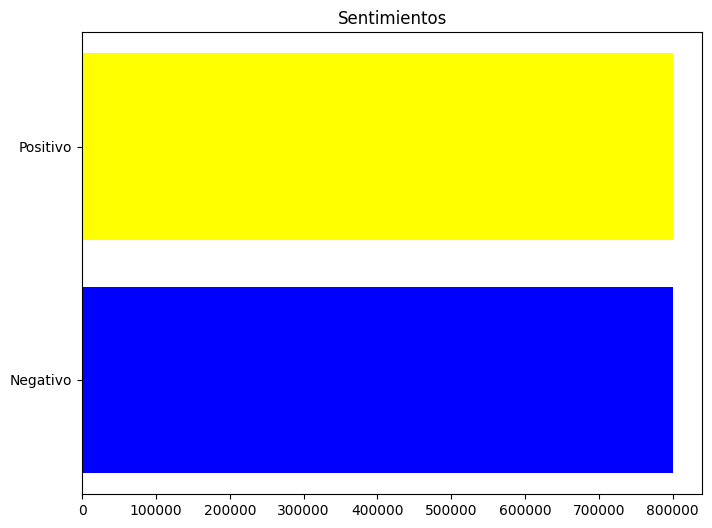

In [ ]:
sentimientos = dataset['target'].value_counts()
sentimientos_labels = {'Negativo': 0, 'Positivo': 1}
plt.figure(figsize=(8, 6))
plt.barh(list(sentimientos_labels.keys()), list(sentimientos.values), color=['blue', 'yellow', 'blue'])
plt.xlabel("")
plt.yticks(list(sentimientos_labels.values()), list(sentimientos_labels.keys()))
plt.title("Sentimientos")

plt.show()

Al querer realizar una exploración profunda de emociones textuales, vamos a utilizar como arquitectura de la red redes convolucionales, mostraremos como luce el dataset, para eso enseñaremos las primeras 20 filas para ver cómo es que lo vamos a entrenar, por lo que primero debemos de eliminar columnas inecesarias y limpiar el texto ya sea de signos de puntuación o el nombre de los usuarios que escribieron el texto, para eso utilizaremos una función limpiar_texto, después de imprimiran las 20 filas del dataset.

In [ ]:
# Función para limpiar el texto}

stop_words = set(stopwords.words('english'))

def limpiar_texto(texto):
    texto = re.sub(r'@[A-Za-z0-9]+', '', texto)  # Eliminar menciones
    texto = re.sub(r'https?://[A-Za-z0-9./]+', '', texto)  # Eliminar enlaces
    texto = re.sub(r'#', '', texto)  # Eliminar hashtags
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
    texto = re.sub(r"\s+", " ", texto).strip() #Eliminar espacios en blanco
    texto = texto.lower()  # Convertir a minúsculas

    tokens = []
    for token in texto.split():
      if token not in stop_words and len(token) > 3:
        tokens.append(token)

    return " ".join(tokens)


In [ ]:
dataset['text_clean'] = dataset['text'].apply(limpiar_texto)

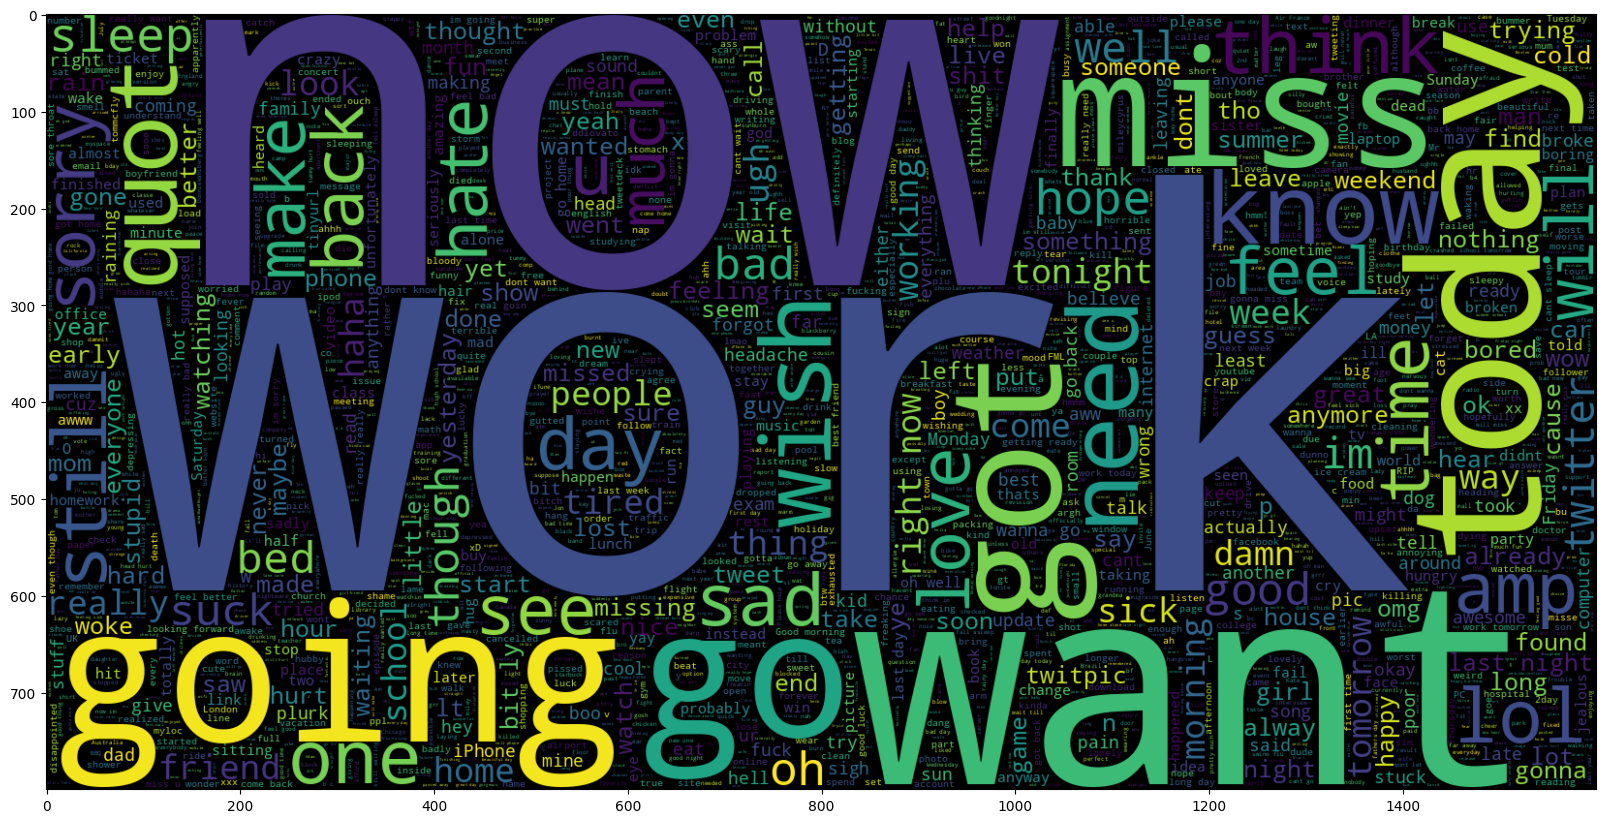

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dataset[dataset.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

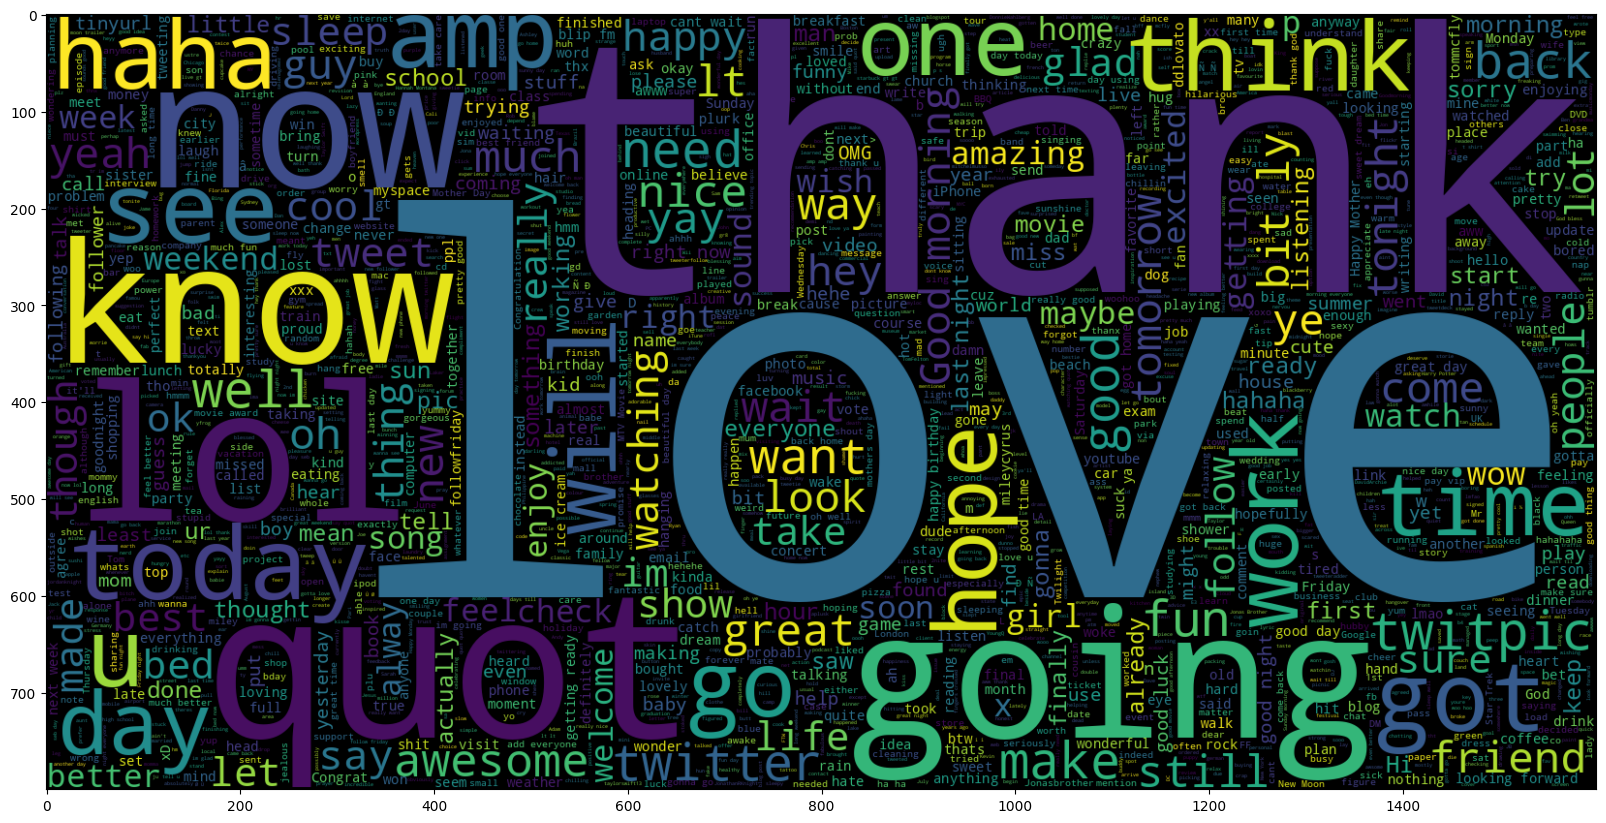

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dataset[dataset.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
print(dataset['text_clean'].head(20), '\n')

0            awww thats bummer shoulda david carr third
1     upset cant update facebook texting might resul...
2        dived many times ball managed save rest bounds
3                      whole body feels itchy like fire
4                                         behaving cant
5                                            whole crew
6                                                  need
7                      long time rains fine thanks hows
8                                            nope didnt
9                                                 muera
10                      spring break plain city snowing
11                                       repierced ears
12         couldnt bear watch thought loss embarrassing
13                     counts either never talk anymore
14    wouldve first didnt really though snyders douc...
15                             wish watch miss premiere
16    hollis death scene hurt severely watch film di...
17                                           fil

# Dividir un conjunto de datos en conjuntos de entrenamiento y prueba. 

Se eliminan las columnas innecesarias del dataset y se convierte la columna 'target' de 4 (positivo) a 1 y 0 (negativo) a 0, después se utiliza la librería WordCloud para generar una nube de palabras que muestra las palabras más frecuentes en el dataset. Se toma una muestra del dataset y se divide en conjuntos de entrenamiento y prueba con train_test_split.
Se utiliza la clase Tokenizer de Keras para tokenizar los textos y convertirlos en secuencias de números. Luego, se aplica padding a las secuencias para que tengan la misma longitud máxima. Una vez que tengamos esto ahora se podrá realizar la construcción del modelo, entonces se construye un modelo de red convolucional 

In [ ]:
X = dataset['text_clean']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
print("Train Data size:", len(X_train), len(y_train))
print("Test Data size", len(X_test), len(y_test))

Train Data size: 1280000 1280000
Test Data size 320000 320000


In [ ]:
max_words = 10000
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
batch_size=512
vocab_size = len(tokenizer.word_index)
embedding_dim = 100
print(vocab_size)

383346


In [ ]:
max_length = max([len(seq) for seq in X_train])
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)
print(f"Post padding train: {X_train.shape}")
print(f"Post padding test:{X_test.shape}")

Post padding train: (1280000, 27)
Post padding test:(320000, 27)


# Construye el modelo de red convolucional

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.pipeline import make_pipeline
from tensorflow.keras import datasets,models,layers
from tensorflow.keras.layers import Conv1D, Concatenate, GlobalMaxPooling1D, GlobalAveragePooling1D, Dense, Embedding, Input,BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
CNN=models.Sequential([
    layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    layers.Dropout(0.5),

    layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
    layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
    layers.GlobalMaxPooling1D(),

    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')
])

CNN.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

Epoch 1/15
2500/2500 [==============================] - 88s 33ms/step - loss: 0.5032 - accuracy: 0.7547
Epoch 2/15
2500/2500 [==============================] - 49s 20ms/step - loss: 0.4775 - accuracy: 0.7729
Epoch 3/15
2500/2500 [==============================] - 49s 20ms/step - loss: 0.4688 - accuracy: 0.7779
Epoch 4/15
2500/2500 [==============================] - 48s 19ms/step - loss: 0.4623 - accuracy: 0.7816
Epoch 5/15
2500/2500 [==============================] - 48s 19ms/step - loss: 0.4569 - accuracy: 0.7846
Epoch 6/15
2500/2500 [==============================] - 49s 19ms/step - loss: 0.4522 - accuracy: 0.7873
Epoch 7/15
2500/2500 [==============================] - 48s 19ms/step - loss: 0.4478 - accuracy: 0.7897
Epoch 8/15
2500/2500 [==============================] - 47s 19ms/step - loss: 0.4441 - accuracy: 0.7917
Epoch 9/15
2500/2500 [==============================] - 47s 19ms/step - loss: 0.4405 - accuracy: 0.7937
Epoch 10/15
2500/2500 [==============================] - 47s 19m

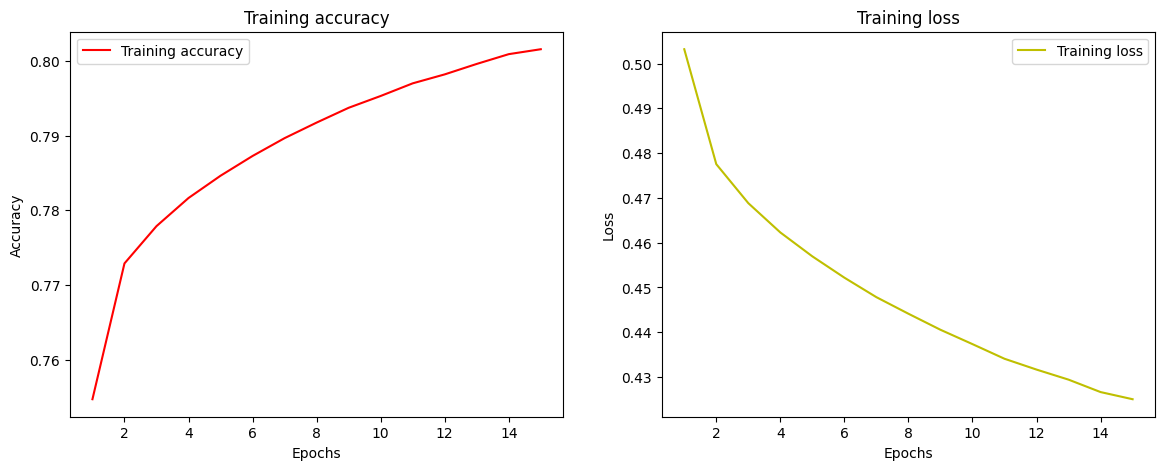

In [ ]:
history=CNN.fit(X_train, y_train, epochs=15,batch_size=batch_size)

loss, accuracy = CNN.evaluate(X_test, y_test, verbose=0)
#print("Accuracy: {:.2f}%".format(accuracy * 100))

def plot_history(history):
    acc = history.history['accuracy']
    loss = history.history['loss']

    epochs = range(1, len(acc) + 1)

    # Training Y validation accuracy
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Training Y validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

In [ ]:
CNN.evaluate(X_test, y_test)

10000/10000 [==============================] - 42s 4ms/step - loss: 0.4736 - accuracy: 0.7754


[0.47357022762298584, 0.7753562331199646]

In [ ]:
loss, accuracy = CNN.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 77.54%


## Matriz de confusión

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf

10000/10000 [==============================] - 27s 3ms/step


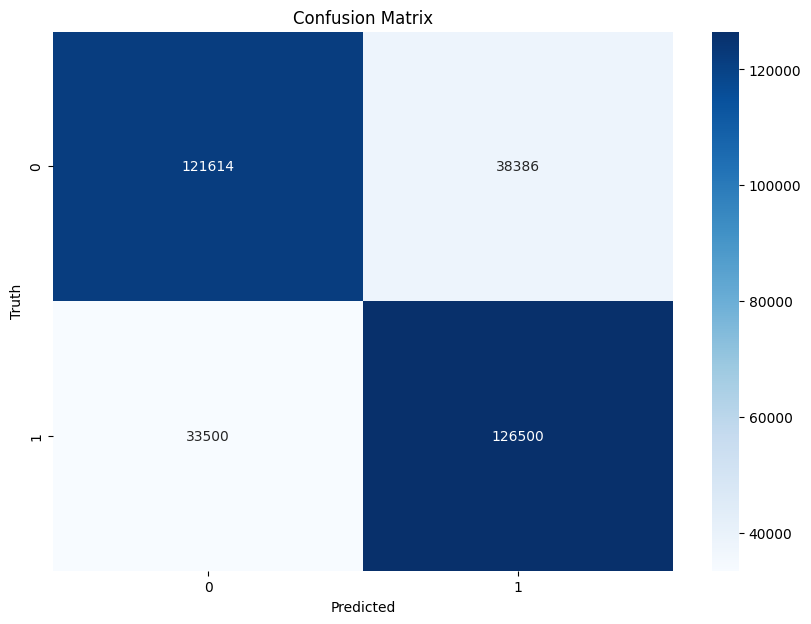

In [ ]:
# Generar la matriz de confusión
y_pred = CNN.predict(X_test)
y_pred_rounded = np.round(y_pred)
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rounded)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# Predicciones en el conjunto de prueba
predictions = CNN.predict(X_train)
# Convertir las probabilidades a clases binarias usando un umbral de 0.5
binary_predictions = (predictions > 0.5).astype("int32")

# Generar el reporte de clasificación
print(classification_report(y_test, y_pred_rounded, target_names=['Class 0', 'Class 1']))

40000/40000 [==============================] - 80s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.78      0.76      0.77    160000
     Class 1       0.77      0.79      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



Se utiliza la matriz de confusión para evaluar el rendimiento del modelo. La matriz de confusión es una tabla que muestra las predicciones correctas e incorrectas hechas por el modelo en comparación con los datos reales

In [ ]:
def predict_sentiments(model, tokenizer, data, num_samples=10):
    '''Función para predecir sentimientos en tweets'''
    results = []
    for _ in range(num_samples):
        index = np.random.randint(0, len(data))
        tweet = dataset.iloc[index]['text']
        y_true = dataset.iloc[index]['target']
        cleaned_tweet = limpiar_texto(tweet)
        sequence = tokenizer.texts_to_sequences([cleaned_tweet])
        padded_sequence = pad_sequences(sequence, maxlen=max_length)
        prediction = model.predict(padded_sequence)[0][0]
        sentiment = 1 if prediction >= 0.5 else 0
        results.append((tweet, sentiment, y_true))

    return results

    results = predict_sentiments(CNN, tokenizer, data, num_samples=10)
    for i, (tweet, sentiment, y_true) in enumerate(results, 1):
      print(f"Sample {i}:")
      print("Tweet:", tweet)
      print("Predicted Sentiment:", sentiment)
      print("True Sent]iment:", "Positive" if y_true == 1 else "Negative")
      print()

In [ ]:
def resultados(modelo, tokenizer, data, num_muestras=10):
    results = []
    for _ in range(num_muestras):
        index = np.random.randint(0, len(data))
        tweet = data.iloc[index]['text']
        y_true = data.iloc[index]['target']
        texto_limpio = limpiar_texto(tweet)
        sequence = tokenizer.texts_to_sequences([texto_limpio])
        padded_sequence = pad_sequences(sequence, maxlen = max_length)
        prediction = modelo.predict(padded_sequence)[0][0]
        sentimiento = "Positivo" if prediction >= 0.5 else "Negativo"
        results.append((tweet, sentimiento, y_true))

    return results

results = resultados(CNN, tokenizer, dataset, num_muestras=10)
for i, (tweet, sentiment, y_true) in enumerate(results, 1):
    print(f"Ejemplo {i}:")
    print("Tweet:", tweet)
    print("Sentimiento predecido:", sentiment)
    print("Sentimiento verdadero:", "Positivo" if y_true == 1 else "Negativo")
    print()

1/1 [==============================] - 0s 53ms/step
Ejemplo 1:
Tweet: http://twitpic.com/6nl8p - Just figured out how to work this twitpic business 
Sentimiento predecido: Positivo
Sentimiento verdadero: Positivo

Ejemplo 2:
Tweet: Cousin keeps crying and whining gahh 
Sentimiento predecido: Negativo
Sentimiento verdadero: Negativo

Ejemplo 3:
Tweet: @jojoxx books, they're the future 
Sentimiento predecido: Positivo
Sentimiento verdadero: Positivo

Ejemplo 4:
Tweet: Follow me  I'm on auto-follow...
Sentimiento predecido: Positivo
Sentimiento verdadero: Positivo

Ejemplo 5:
Tweet: getting invited out sucks when you have no motivation what so ever 
Sentimiento predecido: Negativo
Sentimiento verdadero: Negativo

Ejemplo 6:
Tweet: men are so stupid sometimes  they cant hold a decent conversation
Sentimiento predecido: Negativo
Sentimiento verdadero: Negativo

Ejemplo 7:
Tweet: @lancefisher You know you want to do some WSH Perl scripting.  
Sentimiento predecido: Negativo
Sentimiento verda